# Iris Flower Classification using Unsupervised Learning

In [106]:
#Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = pd.read_csv("C:/random/iris.csv")
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# K-Means Clustering

In [107]:
from sklearn.cluster import KMeans

# K_means clustering with k=3
x = iris.iloc[:, [0,1,2,3]].values
km = KMeans(n_clusters=3)
y_means = km.fit_predict(x)
print(y_means)

km.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


array([[125.        ,   6.57058824,   2.97058824,   5.52352941],
       [ 25.        ,   5.00612245,   3.42040816,   1.46530612],
       [ 74.5       ,   5.922     ,   2.78      ,   4.206     ]])

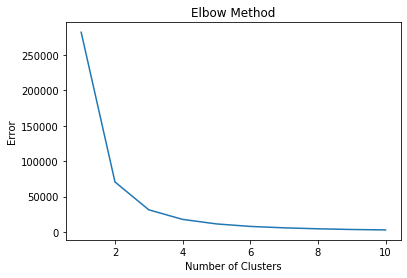

In [108]:
# Elbow method

Error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.show()


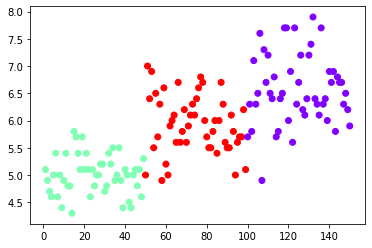

In [109]:
# Visualizing clustering
plt.scatter(x[:, 0] , x[:, 1] , c=y_means , cmap='rainbow')

# Hierarchical Clustering

In [110]:
#Importing modules
%matplotlib inline
# drop Id column
iris = iris.drop('Id',axis=1)

#Reading the dataframe
iris_d = iris[['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']]
iris_d.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


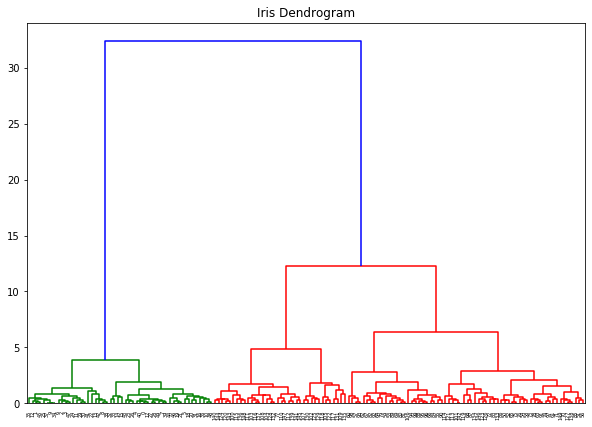

In [111]:
#Dendrogram plotting
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Iris Dendrogram")
dend = shc.dendrogram(shc.linkage(iris_d , method='ward'))


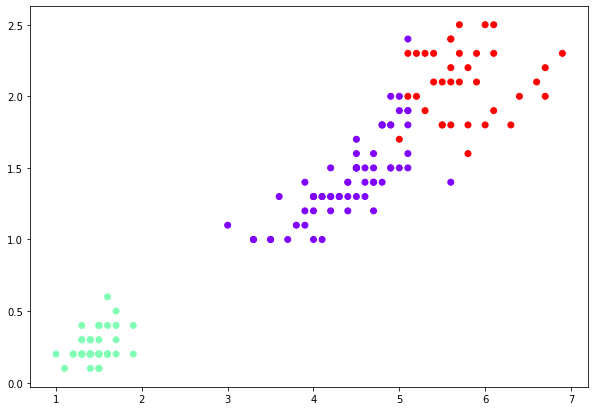

In [112]:
#Divide the data into three clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(iris_d)
plt.figure(figsize=(10,7))
plt.scatter(iris_d['PetalLengthCm'] , iris_d['PetalWidthCm'] , c=cluster.labels_ , cmap='rainbow')

# Principal Component Analysis (PCA)

In [113]:
from sklearn.preprocessing import StandardScaler
features = ['SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']

#separating out the features
x = iris.loc[: , features].values

#separating out the target
y = iris.loc[: , ['Species']].values

#standardizing the features
x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)

principalData = pd.DataFrame(data = principalComponents , columns = 
                            ['principal component 1' , 'principal component 2'])
principalData.head(5)


,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [115]:
iris[['Species']].head()

finalData = pd.concat([principalData , iris[['Species']]] , axis=1)
finalData.head(5)

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


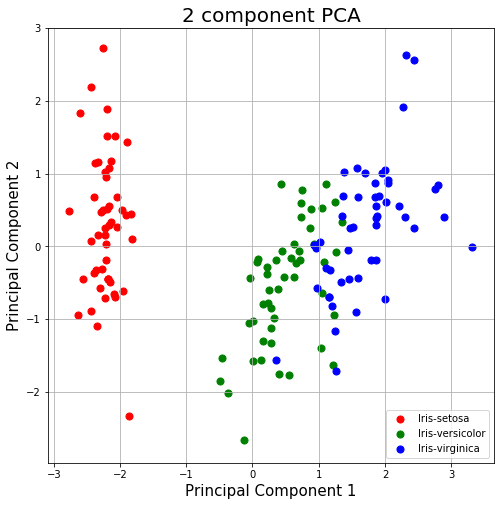

In [116]:
#visualize 2D projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1' , fontsize = 15)
ax.set_ylabel('Principal Component 2' , fontsize = 15)
ax.set_title('2 component PCA' , fontsize = 20)

targets = ['Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalData['Species'] == target
    ax.scatter(finalData.loc[indicesToKeep, 'principal component 1'] , 
               finalData.loc[indicesToKeep, 'principal component 2'] , 
               c = color, s = 50)
ax.legend(targets)
ax.grid()

#  Single Value Decomposition

In [117]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris

iris_ds = load_iris()

svd = TruncatedSVD(n_components=2 , n_iter=7 , random_state = 42)
svd.fit(iris_ds.data)
print(svd.singular_values_)

[95.95991387 17.76103366]


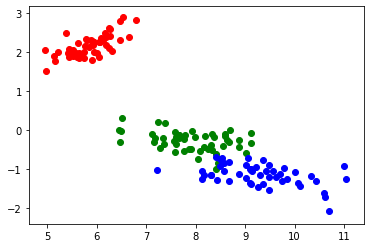

In [118]:
# Getting the U matrix

u = svd.fit_transform(iris_ds.data)
d = svd.singular_values_
vt = svd.components_
iris_ds.target_names

x1 = u[:,0]
x2 = u[:,1]
cdict = {iris_ds.target_names[0]:"red" , iris_ds.target_names[1]:"green" , iris_ds.target_names[2]:"blue"}

plt.figure()
for i in range(0,x1.shape[0]):
    color_index = iris_ds.target_names[iris_ds.target[i]]
    plt.scatter(x1[i] , x2[i] , c=cdict[color_index])
    
plt.show()

In [119]:
# Manual Computation of SVD

Unp, Dnp, VTnp = np.linalg.svd(iris_ds.data)
# svd using randomized svd
from sklearn.utils.extmath import randomized_svd
Urs, Sigmars, VTrs = randomized_svd(iris_ds.data , n_components=2 , n_iter=7 , random_state = None)

print(Urs, Dnp)
print(VT, VTnp, VTrs)
print(Sigmars)

[[ 6.16168450e-02  1.29611444e-01]
 [ 5.80709402e-02  1.11019776e-01]
 [ 5.67630474e-02  1.17966465e-01]
 [ 5.66534426e-02  1.05308145e-01]
 [ 6.12302023e-02  1.31089790e-01]
 [ 6.75031684e-02  1.30884835e-01]
 [ 5.74820774e-02  1.16598182e-01]
 [ 6.09726328e-02  1.20943120e-01]
 [ 5.37611959e-02  9.99414853e-02]
 [ 5.88266594e-02  1.12043088e-01]
 [ 6.52918230e-02  1.36578094e-01]
 [ 5.99417779e-02  1.13753142e-01]
 [ 5.71132323e-02  1.11354756e-01]
 [ 5.15957540e-02  1.15324791e-01]
 [ 6.80071908e-02  1.64183057e-01]
 [ 7.07625894e-02  1.59056485e-01]
 [ 6.53647385e-02  1.46844820e-01]
 [ 6.17918218e-02  1.27676473e-01]
 [ 6.92802967e-02  1.34541441e-01]
 [ 6.35146947e-02  1.32921488e-01]
 [ 6.51727724e-02  1.19363091e-01]
 [ 6.32935829e-02  1.27908181e-01]
 [ 5.59608478e-02  1.40649812e-01]
 [ 6.29534207e-02  1.05679869e-01]
 [ 6.15456003e-02  1.01783154e-01]
 [ 5.99228863e-02  1.04639775e-01]
 [ 6.18571938e-02  1.13083182e-01]
 [ 6.29341837e-02  1.27221439e-01]
 [ 6.20034877e-02  1

NameError: name 'VT' is not defined